 Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

Loading Dataset

In [ ]:
#Loading the IMDB dataset CSV file
data=pd.read_csv(r"DataBase\IMDB_Dataset.csv")

In [3]:
data.shape

(50000, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


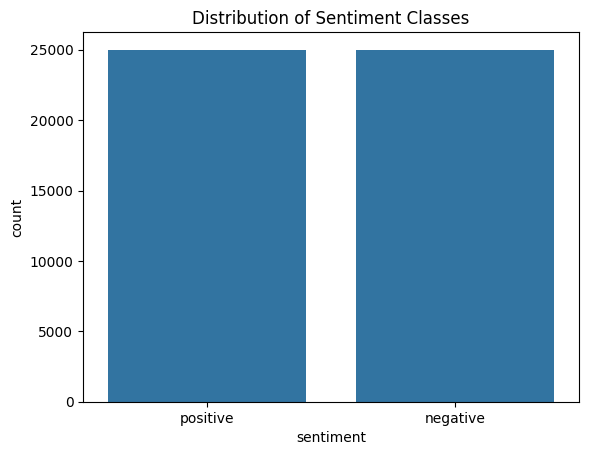

In [7]:
# Visualize the distribution of positive and negative reviews

sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiment Classes')
plt.show()

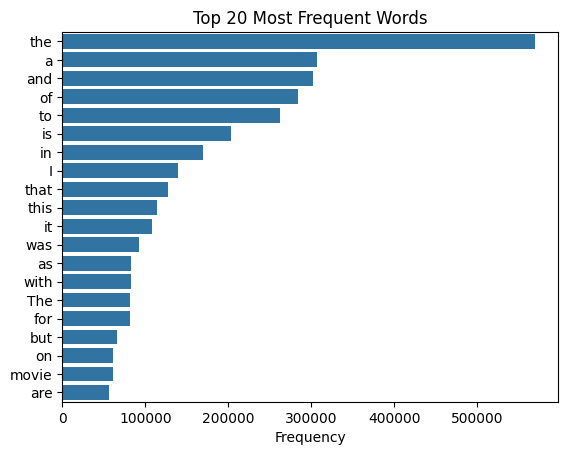

In [8]:
# Visualizing most common words in all reviews to understand vocabulary

all_words = ' '.join(data['review']).replace('<br />', ' ').split()
word_freq = Counter(all_words)
common_words = dict(word_freq.most_common(20))

sns.barplot(x=list(common_words.values()), y=list(common_words.keys()))
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.show()

In [9]:
# Convert into numerical value

# Negative -> 0
# Positive -> 1

data["sentiment"].replace({"negative":0, "positive" :1},inplace=True)

C:\Users\nande\AppData\Local\Temp\ipykernel_15388\3070878869.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["sentiment"].replace({"negative":0, "positive" :1},inplace=True)
C:\Users\nande\AppData\Local\Temp\ipykernel_15388\3070878869.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data

Split data into training and testing set

In [10]:
# 80:20 ratio (80% train, 20% test)
train_data,test_data=train_test_split(data,test_size=0.2,random_state=42)

In [11]:
print(train_data.shape, test_data.shape)

(40000, 2) (10000, 2)


Initialize a tokenizer()

In [12]:
token=Tokenizer(num_words=10000)

# Fit tokenizer on training reviews
token.fit_on_texts(train_data["review"])

Convert training and testing reviews to sequences

In [13]:
X_train=pad_sequences(token.texts_to_sequences(train_data["review"]),maxlen=300)
X_test=pad_sequences(token.texts_to_sequences(test_data["review"]),maxlen=300)

In [14]:
y_train=train_data["sentiment"]
y_test=test_data["sentiment"]

In [15]:
X_train

array([[   2,    1,  447, ...,  205,  351, 3856],
       [   0,    0,    0, ...,   89,  103,    9],
       [   0,    0,    0, ...,    2,  710,   62],
       ...,
       [   0,    0,    0, ..., 1641,    2,  603],
       [   0,    0,    0, ...,  103,  125, 7285],
       [   0,    0,    0, ...,   70,   73, 2062]])

In [16]:
X_test

array([[   0,    0,    0, ...,  995,  719,  155],
       [  12,   67,   26, ...,    7, 9050, 8494],
       [   0,    0,    0, ...,   50, 1088,   96],
       ...,
       [   0,    0,    0, ...,  125,  200, 3241],
       [   0,    0,    0, ..., 1066,    1, 2305],
       [   0,    0,    0, ...,    1,  332,   27]])

In [17]:
print(X_train.shape, X_test.shape)

(40000, 300) (10000, 300)


Building sequential model

In [18]:
model=Sequential()

# Building the neural network with Embedding, LSTM and Dense for binary sentiment classificatio

model.add(Embedding(input_dim=10000, output_dim=128, input_length=300))
model.add(LSTM(256,dropout=0.3,recurrent_dropout=0.3))
model.add(Dense(1,activation="sigmoid"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 256)               394240    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1674497 (6.39 MB)
Trainable params: 1674497 (6.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compiling the model

In [20]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Training the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


500/500 [==============================] - 567s 1s/step - loss: 0.4477 - accuracy: 0.7941 - val_loss: 0.4722 - val_accuracy: 0.7741
Epoch 2/5
202/500 [===========>..................] - ETA: 5:41 - loss: 0.3220 - accuracy: 0.8703

Evaluate the model on the test datase

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)
print(f"Test Loss : {loss}")
print(f"Test Accuarcy : {accuracy}")

313/313 [==============================] - 18s 57ms/step - loss: 0.2988 - accuracy: 0.8852
Test Loss : 0.2987804710865021
Test Accuarcy : 0.885200023651123


**Model achieved ~88.5% accuracy on test data, demonstrating strong sentiment classification performance.**

In [ ]:
# Defining a function to predict sentiment 
def sentiment_prediction(user_review):
    seq=pad_sequences(token.texts_to_sequences([user_review]),maxlen=300)
    prediction=model.predict(seq)
    
    sentiment="Positive" if prediction[0][0]>0.5 else "Negative"
    return sentiment

Testing the sentiment prediction function with sample reviews

**Case 1:Predicting sentiment for a positive review**

(expected: Positive)

In [ ]:
user_review="An absolutely wonderful movie — beautifully directed and emotionally powerful."
print(sentiment_prediction(user_review))

1/1 [==============================] - 0s 42ms/step
Positive


Output: **Positive**

**Case 2:Predicting sentiment for a Negative review**

(expected: Negative)

In [ ]:
user_review="Very Overhyped and underwhelming in every way."
print(sentiment_prediction(user_review))

1/1 [==============================] - 0s 42ms/step
Negative


Output: **Negative**

*The LSTM model for sentiment analysis, based on the IMDB movie reviews dataset from Kaggle (" https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews "), performed exceptionally well with **88.5% accuracy**, demonstrating strong capability in classifying movie sentiments.
It’s also lightweight (~6.4 MB) with approximately **1.67 million trainable parameters**, making it efficient and ready for real-world deployment.*                         


~ *Nandeesh S*          
📧 Email: Nandeesh3573@gmail.com
